# Installs & Imports


In [53]:
!pip install matplotlib
!pip install pandas
!pip install tensorflow
!pip install seaborn
!pip install sklearn

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow import unique
from sklearn.preprocessing import LabelEncoder,scale

# Loading data 

In [55]:
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")
y_test  = pd.read_csv('./sample_submission.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Visualizition

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


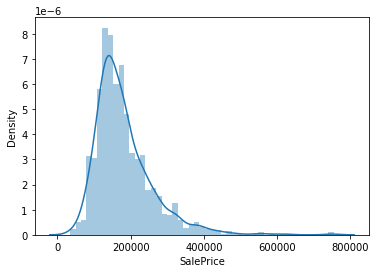

In [76]:
sns.distplot(train_data['SalePrice'])

here we see that the highest price is 800000


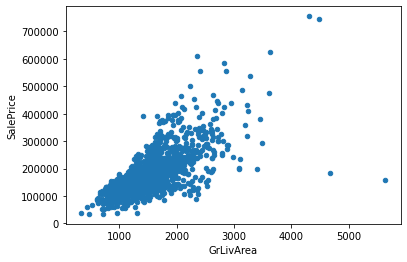

In [81]:
data = pd.concat([train_data['GrLivArea'],train_data['SalePrice']],axis=1)
data.plot.scatter(x='GrLivArea',y='SalePrice')

(-0.5, 8.5, 0.0, 800000.0)

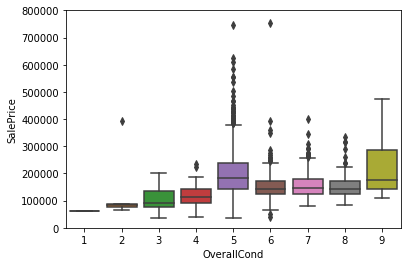

In [91]:
data = pd.concat([train_data['OverallCond'],train_data['SalePrice']],axis=1)
fig = sns.boxplot(x='OverallCond',y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

we can here that we have a correlation between OverallCond , GrLivArea and SalePrice

(-0.5, 111.5, 0.0, 800000.0)

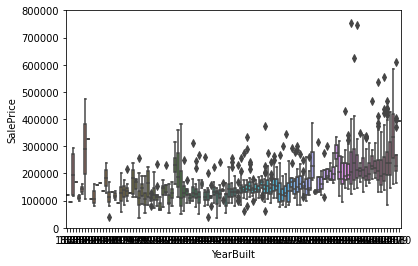

In [93]:
data = pd.concat([train_data['YearRemodAdd'],train_data['SalePrice']],axis=1)
fig = sns.boxplot(x='YearRemodAdd',y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

but here there is no coorelation between SalePrice and YearBuilt

# Pre-Processing


**1- Cleaning The data**

In [56]:
# remove id row
train_data = train_data.drop('Id',axis=1)
test_data  = test_data.drop('Id',axis=1)
y_test  = y_test.drop('Id',axis=1)

In [67]:
# calculate the mean of NaN values
def get_mean(data):
  dic={}
  cols = []
  for col in data:
    nan_num = sum(train_data[col].isna() == True)
    mean    = nan_num/len(train_data)*100000000000
    dic[col] = mean
  return dic
  
mean_nan_test_data = get_mean(test_data)
mean_nan_train_data = get_mean(train_data)
mean_nan_test_data

{'1stFlrSF': 0.0,
 '2ndFlrSF': 0.0,
 '3SsnPorch': 0.0,
 'BedroomAbvGr': 0.0,
 'BldgType': 0.0,
 'BsmtFinSF1': 0.0,
 'BsmtFinSF2': 0.0,
 'BsmtFullBath': 0.0,
 'BsmtHalfBath': 0.0,
 'BsmtUnfSF': 0.0,
 'CentralAir': 0.0,
 'Condition1': 0.0,
 'Condition2': 0.0,
 'EnclosedPorch': 0.0,
 'ExterCond': 0.0,
 'ExterQual': 0.0,
 'Exterior1st': 0.0,
 'Exterior2nd': 0.0,
 'Fireplaces': 0.0,
 'Foundation': 0.0,
 'FullBath': 0.0,
 'Functional': 0.0,
 'GarageArea': 0.0,
 'GarageCars': 0.0,
 'GrLivArea': 0.0,
 'HalfBath': 0.0,
 'Heating': 0.0,
 'HeatingQC': 0.0,
 'HouseStyle': 0.0,
 'KitchenAbvGr': 0.0,
 'KitchenQual': 0.0,
 'LandContour': 0.0,
 'LandSlope': 0.0,
 'LotArea': 0.0,
 'LotConfig': 0.0,
 'LotShape': 0.0,
 'LowQualFinSF': 0.0,
 'MSSubClass': 0.0,
 'MiscVal': 0.0,
 'MoSold': 0.0,
 'Neighborhood': 0.0,
 'OpenPorchSF': 0.0,
 'OverallCond': 0.0,
 'OverallQual': 0.0,
 'PavedDrive': 0.0,
 'PoolArea': 0.0,
 'RoofMatl': 0.0,
 'RoofStyle': 0.0,
 'SaleCondition': 0.0,
 'SaleType': 0.0,
 'ScreenPorch':

In [58]:
# Filtring columns 
def get_cols(dic):
  cols = []
  for col in dic:
    if dic[col] > 0.0:
      cols.append(col)
  return cols

nan_col_test_data = get_cols(mean_nan_test_data)
nan_col_train_data = get_cols(mean_nan_train_data)

nan_col_test_data == nan_col_train_data
nan_col_train_data.append('MSZoning')

In [59]:
# Deletting Columns

train_data = train_data.drop(nan_col_train_data,axis=1)
test_data = test_data.drop(nan_col_train_data,axis=1)
train_data.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


**2- Encoding categorical value** 

In [60]:
def get_cat_features(data):
  cat_features = []
  for col in data:
    try:
      int(data[col][25])
    except ValueError:
      cat_features.append(col)
  return cat_features


categorical_features = get_cat_features(train_data)
categorical_features

['Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [63]:
dic = {}

def encoder(data):
  for feature in categorical_features:
    le = LabelEncoder()
    labels = data[feature]
    print(feature)
    le.fit(labels)
    data[feature] = le.transform(labels)
  return data 

train_data = encoder(train_data)
test_data = encoder(test_data)

Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
Heating
HeatingQC
CentralAir
KitchenQual
Functional
PavedDrive
SaleType
SaleCondition
Street
LotShape
LandContour
Utilities


TypeError: ignored

In [64]:
i = 0
for j in test_data['Utilities']:
  #if i == None:
  try:
    float(j)
    print(j)
    print(i)
    i += 1
  except:
    i += 1
    continue

nan
455
nan
485


,MSSubClass,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,30,21780,0,3,3,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,Fa,Fa,CBlock,0.0,0.0,0.0,0.0,GasA,TA,N,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,1.0,280.0,N,119,24,0,0,0,0,0,3,2009,ConLD,Normal
456,60,10125,1,3,3,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,2Story,8,5,2000,2001,Gable,CompShg,CemntBd,CmentBd,Gd,TA,PConc,445.0,250.0,412.0,1107.0,GasA,Ex,Y,1040,1012,0,2052,0.0,0.0,2,1,3,1,Gd,7,Typ,1,3.0,642.0,Y,210,91,0,0,0,0,0,5,2009,WD,Normal
457,85,9750,1,3,3,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,767.0,0.0,135.0,902.0,GasA,Ex,Y,926,0,0,926,1.0,0.0,1,0,2,1,TA,5,Typ,1,1.0,351.0,Y,319,0,0,0,0,0,0,4,2009,WD,Normal
458,85,9360,1,3,0,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,6,7,1977,1977,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,841.0,116.0,0.0,957.0,GasA,TA,Y,1287,0,0,1287,1.0,0.0,1,1,2,1,TA,5,Typ,2,2.0,541.0,Y,302,39,0,0,120,0,0,11,2009,WD,Normal
459,20,11070,1,3,3,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1991,1991,Gable,CompShg,HdBoard,HdBoard,TA,TA,PConc,55.0,0.0,1527.0,1582.0,GasA,TA,Y,1595,0,0,1595,1.0,0.0,2,0,2,1,TA,5,Typ,0,2.0,672.0,Y,0,0,0,0,0,0,0,4,2009,COD,Abnorml


# Feature Selection


**1- Finding highly correlation between features and results**

In [ ]:
# 
X_train = train_data.drop('SalePrice',axis=1)
y_train = train_data['SalePrice']

corr = train_data.corr().abs()
corr

In [ ]:
sns.heatmap(corr)

now we need to extract the features whos haves the highly correlation (more than 0.6) with results (SalePrice)



In [ ]:
# find the corr between features and SalePrice
corr = train_data.corrwith(train_data['SalePrice']).abs()
corr = dict(corr)
corr

In [ ]:
# exctracting feature
def low_corr(data):
  low_corr_cols = []
  for row in corr:
    if row == 'SalePrice':
      continue
    elif corr[row] < 0.5:
      low_corr_cols.append(row)
  return low_corr_cols

features = low_corr(train_data)
features

In [ ]:
y_train = train_data['SalePrice']
X_train = train_data.drop(features,axis=1)
X_test = test_data.drop(features,axis=1)

# Scaling Data

In [ ]:
X_train

You can see, in some features we have a very large values isn't good for our model we need to scale them  

In [ ]:
#for col in X_train:
#  if X_train[col][0] > 50:
#    feature_for_scale.append(col)
#
#feature_for_scale
def scaler(data)
  feature_for_scale = ['YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea','SalePrice']
  for feature in feature_for_scale:
    data[feature] = scale(data[feature])
  return data

X_train = scaler(X_train)
X_test  = scaler(X_test)

X_train